<a href="https://colab.research.google.com/github/Gouthamreddygunda/Gouthamreddy_INFO5731_Spring2023/blob/main/In_class_exercise_03_02282023_goutham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The third In-class-exercise (2/28/2023, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [24]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
 
I want to understand sentiment towards a product. 
Here, I would like to focus on 'oximeter'. Large amount of people started using it to monitor their health during COVID-19.
 
Now, I wanted to understand which features are useful and what people are thinking about the product. 
 
To start with, I want to focus on a specific manufacturer’s product and perform sentiment analysis on user reviews. The sentiment analysis will give me understanding of users’ feedback and the frequency vector for the data cloud would give me the information on features that the users are reviewing. 
 
For my sentiment analysis on reviews text, I would like to use the POS tagging technique. Parts of speech in the text define the main context, functions, and usage in a sentence. In this method, I am going to label each word on the text corresponding to a particular part of speech based on the definitions and context. 
 
Some of the speech tags that I like to focus on are: 
Nouns, verbs, personal pronouns, Adjective, Adverbs, Coordinating conjunction, Interjections
 
These POS tagged reviews are converted into a matrix of numbers which is given as an input to classifiers. The Classifier will detect the sentiment in the text. 
 
Here is the link for reviews of the product 'Zacurate Pro Series 500DL Fingertip Pulse Oximeter':  https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3




'''

"\nPlease write you answer here:\n \nI want to understand sentiment towards a product. \nHere, I would like to focus on 'oximeter'. Large amount of people started using it to monitor their health during COVID-19.\n \nNow, I wanted to understand which features are useful and what people are thinking about the product. \n \nTo start with, I want to focus on a specific manufacturer’s product and perform sentiment analysis on user reviews. The sentiment analysis will give me understanding of users’ feedback and the frequency vector for the data cloud would give me the information on features that the users are reviewing. \n \nFor my sentiment analysis on reviews text, I would like to use the POS tagging technique. Parts of speech in the text define the main context, functions, and usage in a sentence. In this method, I am going to label each word on the text corresponding to a particular part of speech based on the definitions and context. \n \nSome of the speech tags that I like to focus 

Question 2 (10 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [25]:
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import pandas as pd
Headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    'Accept-Language': 'en-US, en;q=0.5'
}

titles = []
text=[]
for pg in range(1,150):
  url = 'https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_arp_d_paging_btm_next_{str(pg_num)}?ie=UTF8&reviewerType=all_reviews&pageNumber={str(pg_num)}'

  pg = requests.get(url, headers=Headers)
  s = BeautifulSoup(pg.content,'html.parser')
  revw_t = s.find_all('a',class_='review-title-content')
  for i in range(len(revw_t)):
    titles.append(revw_t[i].get_text().strip())
  revw_txt= s.find_all('span',class_='review-text-content')
  for r in range(0,len(revw_txt)):
    text.append(revw_txt[r].get_text().strip()) 
df_revw = pd.DataFrame({
    'Title' : titles,
    'Review': text
})
print(f'Shape of the data frame: {df_revw.shape}')
df_revw

Shape of the data frame: (190, 2)


,Title,Review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was..."
1,like it enough to buy another,i bought a second oximeter to always keep one ...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...
3,Covid Essential,Purchased during our first time with covid sim...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...
...,...,...
185,Worked right out of the box,"You put in the batteries, stick it on your fin..."
186,Speedy delivery on critical supplies,"Like the product, gives us piece of mind knowi..."
187,Very accurate pulse oximeter,This is an accurate pulse oximeter that I use ...
188,A Must Have,A must have item in the home to monitor pulse ...


In [26]:
df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')
df_revw

<ipython-input-26-2f6a8b44ac9d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,i bought a second oximeter to always keep one ...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,I use it to check my O2 saturations and heart ...
3,Covid Essential,Purchased during our first time with covid sim...,Purchased during our first time with covid sim...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,It works perfectly well Im pleased and expect...
...,...,...,...
185,Worked right out of the box,"You put in the batteries, stick it on your fin...",You put in the batteries stick it on your fing...
186,Speedy delivery on critical supplies,"Like the product, gives us piece of mind knowi...",Like the product gives us piece of mind knowin...
187,Very accurate pulse oximeter,This is an accurate pulse oximeter that I use ...,This is an accurate pulse oximeter that I use ...
188,A Must Have,A must have item in the home to monitor pulse ...,A must have item in the home to monitor pulse ...


In [27]:
# Remove numbers
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')
# remove special characters
import re
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].apply(lambda t : ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in t))
df_revw

<ipython-input-27-df1ba766ac24>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,i bought a second oximeter to always keep one ...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,I use it to check my O saturations and heart r...
3,Covid Essential,Purchased during our first time with covid sim...,Purchased during our first time with covid sim...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,It works perfectly well Im pleased and expect...
...,...,...,...
185,Worked right out of the box,"You put in the batteries, stick it on your fin...",You put in the batteries stick it on your fing...
186,Speedy delivery on critical supplies,"Like the product, gives us piece of mind knowi...",Like the product gives us piece of mind knowin...
187,Very accurate pulse oximeter,This is an accurate pulse oximeter that I use ...,This is an accurate pulse oximeter that I use ...
188,A Must Have,A must have item in the home to monitor pulse ...,A must have item in the home to monitor pulse ...


In [28]:
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply(lambda text: " ".join(word.lower() for word in text.split()))
df_revw

,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",in this uncertain covid era we learned it was ...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,i bought a second oximeter to always keep one ...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,i use it to check my o saturations and heart r...
3,Covid Essential,Purchased during our first time with covid sim...,purchased during our first time with covid sim...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,it works perfectly well im pleased and expect ...
...,...,...,...
185,Worked right out of the box,"You put in the batteries, stick it on your fin...",you put in the batteries stick it on your fing...
186,Speedy delivery on critical supplies,"Like the product, gives us piece of mind knowi...",like the product gives us piece of mind knowin...
187,Very accurate pulse oximeter,This is an accurate pulse oximeter that I use ...,this is an accurate pulse oximeter that i use ...
188,A Must Have,A must have item in the home to monitor pulse ...,a must have item in the home to monitor pulse ...


In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply( lambda text : " ".join(w for w in text.split() if w not in sw) )
df_revw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturations heart rate oxygen someti...
3,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,works perfectly well im pleased expect use oft...
...,...,...,...
185,Worked right out of the box,"You put in the batteries, stick it on your fin...",put batteries stick finger get reading numbers...
186,Speedy delivery on critical supplies,"Like the product, gives us piece of mind knowi...",like product gives us piece mind knowing check...
187,Very accurate pulse oximeter,This is an accurate pulse oximeter that I use ...,accurate pulse oximeter use afib heart conditi...
188,A Must Have,A must have item in the home to monitor pulse ...,must item home monitor pulse blood oxygen affo...


In [30]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from textblob import Word
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply( lambda text : " ".join([ Word(i).lemmatize() for i in text.split()]))
df_revw

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturation heart rate oxygen sometim...
3,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,work perfectly well im pleased expect use ofte...
...,...,...,...
185,Worked right out of the box,"You put in the batteries, stick it on your fin...",put battery stick finger get reading number bi...
186,Speedy delivery on critical supplies,"Like the product, gives us piece of mind knowi...",like product give u piece mind knowing check o...
187,Very accurate pulse oximeter,This is an accurate pulse oximeter that I use ...,accurate pulse oximeter use afib heart conditi...
188,A Must Have,A must have item in the home to monitor pulse ...,must item home monitor pulse blood oxygen affo...


In [31]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
df_revw['tagged_pos'] = df_revw['preprocessed_review'].str.split().map(pos_tag)
df_revw

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Title,Review,preprocessed_review,tagged_pos
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea..."
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...,"[(bought, JJ), (second, JJ), (oximeter, NN), (..."
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturation heart rate oxygen sometim...,"[(use, NN), (check, NN), (saturation, NN), (he..."
3,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...,"[(purchased, VBN), (first, JJ), (time, NN), (c..."
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,work perfectly well im pleased expect use ofte...,"[(work, NN), (perfectly, RB), (well, RB), (im,..."
...,...,...,...,...
185,Worked right out of the box,"You put in the batteries, stick it on your fin...",put battery stick finger get reading number bi...,"[(put, VB), (battery, NN), (stick, NN), (finge..."
186,Speedy delivery on critical supplies,"Like the product, gives us piece of mind knowi...",like product give u piece mind knowing check o...,"[(like, IN), (product, NN), (give, VB), (u, JJ..."
187,Very accurate pulse oximeter,This is an accurate pulse oximeter that I use ...,accurate pulse oximeter use afib heart conditi...,"[(accurate, NN), (pulse, NN), (oximeter, NN), ..."
188,A Must Have,A must have item in the home to monitor pulse ...,must item home monitor pulse blood oxygen affo...,"[(must, MD), (item, VB), (home, NN), (monitor,..."


In [32]:
#Adding count of POS of each row
adjective = []
adverb = []
c_con = []
s_con = []
intj = []
no = []
ve = []
pro = []
pre = []
det= []
def tags(atags):
  for t in atags:
    na= 0
    nad = 0
    ncon= 0
    nsconj = 0
    ninter = 0
    nno = 0
    nve= 0
    nppro= 0
    npredet = 0
    ndet = 0
    for i,j in t:
      if j == 'JJ':
        na =  na + 1
      elif j == 'RB':
        nad = nad + 1
      elif j == 'CC':
        nccon = nccon + 1
      elif j == 'UH':
        ninter = ninter + 1
      elif j == 'NN':
        nno = nno + 1
      elif j == 'VR':
        nve = nve + 1
      elif j == 'PRP':
        nppro = nppro + 1
      elif j == 'PDT':
        npredet = npredet + 1
      elif j == 'DT':
        ndet = ndet + 1
      elif j == 'IN':
        nsconj = nsconj + 1
    
    adjective.append(na)
    adverb.append(nad)
    c_con.append(ncon)
    s_con.append(nsconj)
    intj.append(ninter)
    no.append(nno)
    ve.append(nve)
    pro.append(nppro)
    pre.append(npredet)
    det.append(ndet)
tags(df_revw['tagged_pos'])
df_revw['num of adj'] = adjective
df_revw['num of adverb'] = adverb
df_revw['num of conjunction'] = c_con
df_revw['num of conjuction'] = s_con
df_revw['num of interjection'] = intj
df_revw['num of noun'] = no
df_revw['num of verb'] = ve
df_revw['num of pronoun'] = pro
df_revw['nump of predeterminer'] = pre
df_revw['num of determiner'] = det

df_revw

,Title,Review,preprocessed_review,tagged_pos,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea...",52,28,0,2,0,90,0,0,0,0
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...,"[(bought, JJ), (second, JJ), (oximeter, NN), (...",27,7,0,1,0,26,0,0,0,1
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturation heart rate oxygen sometim...,"[(use, NN), (check, NN), (saturation, NN), (he...",5,3,0,0,0,16,0,0,0,0
3,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...,"[(purchased, VBN), (first, JJ), (time, NN), (c...",7,3,0,1,0,12,0,0,0,0
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,work perfectly well im pleased expect use ofte...,"[(work, NN), (perfectly, RB), (well, RB), (im,...",13,9,0,1,0,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Worked right out of the box,"You put in the batteries, stick it on your fin...",put battery stick finger get reading number bi...,"[(put, VB), (battery, NN), (stick, NN), (finge...",2,0,0,0,0,5,0,0,0,0
186,Speedy delivery on critical supplies,"Like the product, gives us piece of mind knowi...",like product give u piece mind knowing check o...,"[(like, IN), (product, NN), (give, VB), (u, JJ...",1,0,0,1,0,5,0,0,0,0
187,Very accurate pulse oximeter,This is an accurate pulse oximeter that I use ...,accurate pulse oximeter use afib heart conditi...,"[(accurate, NN), (pulse, NN), (oximeter, NN), ...",4,1,0,0,0,10,0,1,0,0
188,A Must Have,A must have item in the home to monitor pulse ...,must item home monitor pulse blood oxygen affo...,"[(must, MD), (item, VB), (home, NN), (monitor,...",2,1,0,0,0,6,0,0,0,0


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [33]:
# You code here (Please add comments in the code):
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_feat = df_revw.select_dtypes(include=num)
print(f'Shape: {num_feat.shape}')
num_feat




Shape: (190, 10)


,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,52,28,0,2,0,90,0,0,0,0
1,27,7,0,1,0,26,0,0,0,1
2,5,3,0,0,0,16,0,0,0,0
3,7,3,0,1,0,12,0,0,0,0
4,13,9,0,1,0,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
185,2,0,0,0,0,5,0,0,0,0
186,1,0,0,1,0,5,0,0,0,0
187,4,1,0,0,0,10,0,1,0,0
188,2,1,0,0,0,6,0,0,0,0


In [34]:
a = num_feat
b = df_revw['preprocessed_review']
print(f'SHAPE of X: {a.shape}')
print(f'SHAPE of Y: {b.shape}')

SHAPE of X: (190, 10)
SHAPE of Y: (190,)


In [35]:
xt, xte, yt, yte = train_test_split(a, b, test_size=0.2, random_state=60)
xt.shape, xte.shape

((152, 10), (38, 10))

<AxesSubplot:>

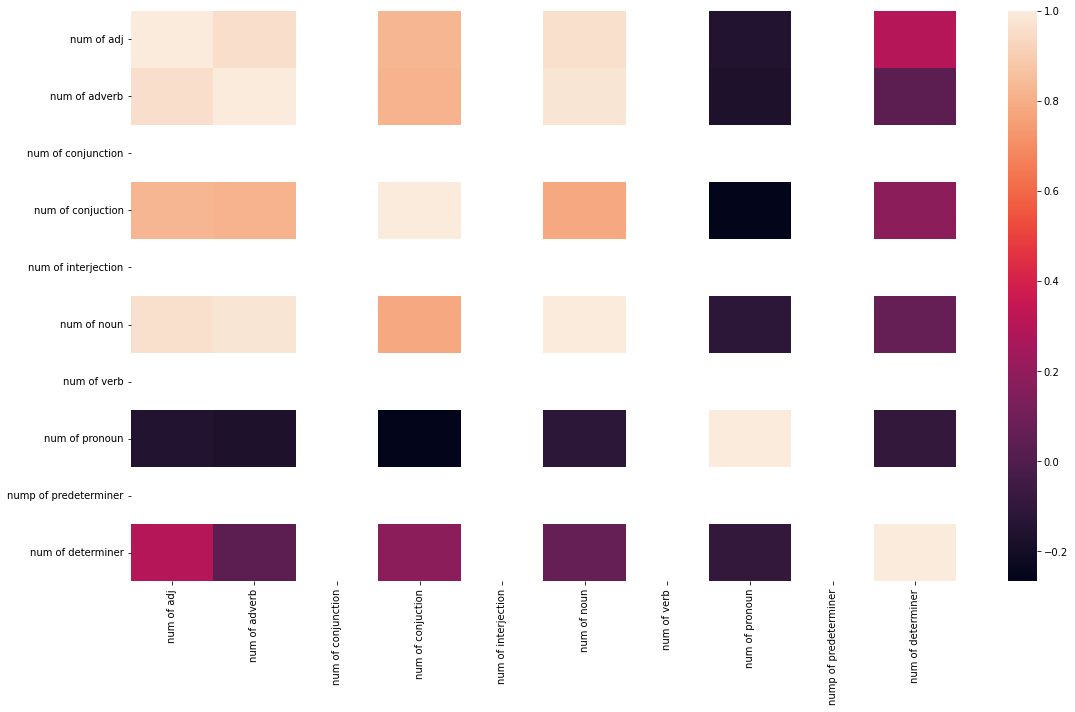

In [36]:
cor = xt.corr()
f, a = plt.subplots()
f.set_size_inches(18.5, 10.5)
sns.heatmap(cor)

In [37]:
def correlated(co, thres):
  col = []
  data = co.corr()
  for r in range(len(data.columns)):
    for c in range(r):
      if (abs(data.iloc[r, c]) > thres):
        col.append(data.columns[r])
  return col


corr = list(set(correlated(xt, 0.5)))
print(f'correlated features are: {set(corr)}')

correlated features are: {'num of conjuction', 'num of noun', 'num of adverb'}


In [38]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=100, max_depth=2)
forest.fit(xt[corr].fillna(0), yt)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=100)

In [39]:
w = pd.concat([pd.Series(corr), pd.Series(forest.feature_importances_)], axis=1)
w.columns = ['columns', 'weight']
w.sort_values(by='weight', ascending=False)

,columns,weight
0,num of conjuction,0.397030
2,num of adverb,0.377074
1,num of noun,0.225896


Question 4 (10 points): Write python code to rank the text based on text similarity. Based on the text data you used for question 2, design a query to match the most relevant docments. Please use the BERT model to represent both your query and the text data, then calculate the cosine similarity between the query and each text in your data. Rank the similary with descending order. 

In [40]:
!pip install torchvision 
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# You code here (Please add comments in the code):
# Import required libraries
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Define the text data and query
text_data = df_revw['preprocessed_review']
query = 'This is a test query'

# Prepare the input data by encoding the text data and query using the BERT tokenizer
encoded_text_data = tokenizer(text_data, padding=True, truncation=True, return_tensors='pt')
encoded_query = tokenizer(query, padding=True, truncation=True, return_tensors='pt')

# Pass the input data through the BERT model to obtain the embeddings
with torch.no_grad():
    text_embeddings = model(**encoded_text_data)[0][:, 0, :]
    query_embedding = model(**encoded_query)[0][:, 0, :]

# Calculate the cosine similarity between the query and each text data embedding using numpy
similarity_scores = cosine_similarity(query_embedding, text_embeddings)

# Sort the similarity scores in descending order to rank the text data based on similarity
ranked_indices = np.argsort(similarity_scores, axis=1)[:, ::-1]
ranked_text_data = [text_data[i] for i in ranked_indices[0]]

print(ranked_text_data)